# Kadir Berat YILDIRIM

## Deep Learning in Medical Imaging Homework 2

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

# From Hw1

In [2]:
df = pd.read_csv('data.csv')
df.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [3]:
df.drop('Unnamed: 32', axis = 1, inplace = True) # Get rid of faulty column

In [4]:
df.describe()

,id,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
count,5.690000e+02,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,3.037183e+07,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,...,16.269190,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946
std,1.250206e+08,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,...,4.833242,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061
min,8.670000e+03,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,...,7.930000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040
25%,8.692180e+05,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,...,13.010000,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460
50%,9.060240e+05,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,...,14.970000,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040
75%,8.813129e+06,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,...,18.790000,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080
max,9.113205e+08,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,...,36.040000,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500


In [5]:
y = df.diagnosis.to_numpy()
X = df.iloc[:, 2:].to_numpy()

In [6]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()

In [7]:
from sklearn.preprocessing import MinMaxScaler

def scale(X_train, X_test, verbose = False):
    scaler = MinMaxScaler()
    X_train_scaled = scaler.fit_transform(X_train)
    X_test_scaled = scaler.transform(X_test)
    if verbose:
        print('X Train max value: ', X_train_scaled.max(), '\nX Test max value: ', X_test_scaled.max())
        print('X Train min value: ', X_train_scaled.min(), '\nX Test min value: ', X_test_scaled.min())
    return X_train_scaled, X_test_scaled

In [8]:
from sklearn.preprocessing import OneHotEncoder

def onehot(y_train, y_test):
    ohe = OneHotEncoder()
    train = ohe.fit_transform(y_train.reshape(-1, 1)).toarray()
    test = ohe.transform(y_test.reshape(-1, 1)).toarray()
    return train, test, ohe

In [9]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score

def metrics(preds, y_test, ohe, verbose = False):
    # Only roc auc uses onehot encoded form, for other metrics, use string form
    # So I inverse transform here, since I will give onehot encoded form here
    inv_preds = ohe.inverse_transform(preds)
    inv_y_test = ohe.inverse_transform(y_test)
    
    acc = accuracy_score(inv_preds, inv_y_test)
    precision = precision_score(inv_preds, inv_y_test, pos_label = 'B')
    recall = recall_score(inv_preds, inv_y_test, pos_label = 'B')
    f1 = f1_score(inv_preds, inv_y_test, pos_label = 'B')
    
    ras = roc_auc_score(y_test, preds)
    
    if verbose:
        print('Accuracy: ', acc, \
             '\nPrecision: ', precision, \
             '\nRecall: ', recall, \
             '\nF1 Score: ', f1, \
             '\nRoc Auc Score: ', ras)
    return [acc, precision, recall, f1, ras]

In [36]:
from sklearn.svm import SVC
from sklearn.model_selection import RepeatedStratifiedKFold

def classify(X, y, verbose = False):
    kf = RepeatedStratifiedKFold(n_splits = 100)
    kf.get_n_splits(X, y)

    scores = []
    for i, (train_index, test_index) in enumerate(kf.split(X, y)):
        # Preprocess
        X_train_scaled, X_test_scaled = scale(X[train_index], X[test_index])
        y_train, y_test, ohe = onehot(y[train_index], y[test_index])

        clf = SVC()
        clf.fit(X_train_scaled, y[train_index])
        preds = clf.predict(X_test_scaled)
        scores.append(metrics(ohe.transform(preds.reshape(-1, 1)).toarray(), y_test, ohe))
    
    if verbose:
        to_print = zip(['Accuracy: ', 'Precision: ', 'Recall: ', 'F1 Score: ', 'Roc Auc: '], \
                       np.array(scores).mean(axis = 0))
        print(*[(i, round(j, 4)) for i, j in to_print])
    return np.array(scores).mean(axis = 0)

# Without Feature Selection

In [33]:
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)

In [34]:
print(classify(X_scaled, y))

[0.9756     0.98666667 0.97996667 0.98094048 0.97191667]


# 1)

# Pearson Correlation

In [39]:
from sklearn.feature_selection import r_regression
from sklearn import preprocessing

le = preprocessing.LabelEncoder()
y_le = le.fit_transform(y)

correlations = r_regression(X_scaled, y_le)

print(correlations)

[ 0.73002851  0.4151853   0.74263553  0.70898384  0.35855997  0.59653368
  0.69635971  0.77661384  0.33049855 -0.0128376   0.56713382 -0.00830333
  0.5561407   0.54823594 -0.06701601  0.29299924  0.25372977  0.40804233
 -0.00652176  0.07797242  0.77645378  0.45690282  0.78291414  0.73382503
  0.42146486  0.59099824  0.65961021  0.79356602  0.41629431  0.32387219]


In [53]:
# By index, most correlated 5 columns are
np.argsort(abs(correlations))[-5:]

array([ 2, 20,  7, 22, 27])

In [52]:
X_pearson = X_scaled[:, np.argsort(abs(correlations))[-5:]] # Taking 5 most correlated features

classify(X_pearson, y, verbose = True)

('Accuracy: ', 0.9474) ('Precision: ', 0.9767) ('Recall: ', 0.9522) ('F1 Score: ', 0.9599) ('Roc Auc: ', 0.9369)


array([0.9474    , 0.97666667, 0.95221667, 0.95988016, 0.93691667])

# Recursive Feature Elimination

I use a for loop here to try out different n_features_to_select parameter.

In [35]:
from sklearn.feature_selection import RFE
from sklearn.svm import SVC

for n in range(5, 15):
    clf = SVC(kernel="linear")
    clf.fit(X_scaled, y)

    selector = RFE(clf, n_features_to_select=n, step=1)
    selector = selector.fit(X_scaled, y)
    
    important = selector.support_
    X_reducted = X_scaled[:,important]
    print('n: {}'.format(n))
    classify(X_reducted, y, verbose = True)

n: 5
('Accuracy: ', 0.97) ('Precision: ', 0.98) ('Recall: ', 0.98) ('F1 Score: ', 0.98) ('Roc Auc: ', 0.97)
n: 6
('Accuracy: ', 0.97) ('Precision: ', 0.97) ('Recall: ', 0.98) ('F1 Score: ', 0.98) ('Roc Auc: ', 0.97)
n: 7
('Accuracy: ', 0.98) ('Precision: ', 0.99) ('Recall: ', 0.98) ('F1 Score: ', 0.98) ('Roc Auc: ', 0.97)
n: 8
('Accuracy: ', 0.97) ('Precision: ', 0.98) ('Recall: ', 0.98) ('F1 Score: ', 0.98) ('Roc Auc: ', 0.97)
n: 9
('Accuracy: ', 0.97) ('Precision: ', 0.99) ('Recall: ', 0.97) ('F1 Score: ', 0.98) ('Roc Auc: ', 0.97)
n: 10
('Accuracy: ', 0.97) ('Precision: ', 0.99) ('Recall: ', 0.98) ('F1 Score: ', 0.98) ('Roc Auc: ', 0.97)
n: 11
('Accuracy: ', 0.97) ('Precision: ', 0.99) ('Recall: ', 0.98) ('F1 Score: ', 0.98) ('Roc Auc: ', 0.97)
n: 12
('Accuracy: ', 0.98) ('Precision: ', 0.99) ('Recall: ', 0.98) ('F1 Score: ', 0.98) ('Roc Auc: ', 0.97)
n: 13
('Accuracy: ', 0.98) ('Precision: ', 0.99) ('Recall: ', 0.98) ('F1 Score: ', 0.98) ('Roc Auc: ', 0.97)
n: 14
('Accuracy: ', 0.9

In [13]:
selector.support_

array([ True, False, False, False,  True,  True,  True,  True,  True,
       False, False,  True,  True, False, False, False, False, False,
       False, False,  True, False, False, False,  True,  True,  True,
        True,  True, False])

In [14]:
selector.ranking_

array([ 1,  8,  3, 17,  1,  1,  1,  1,  1, 14, 12,  1,  1,  9, 10,  6,  5,
        7, 15, 13,  1,  2, 11, 16,  1,  1,  1,  1,  1,  4])

# Random Forest

Using the random forest feature importances, we can visualize importance of features.

There is no need to use scaled dataset in forest algorithms, so I ll be using the non-scaled input array X.

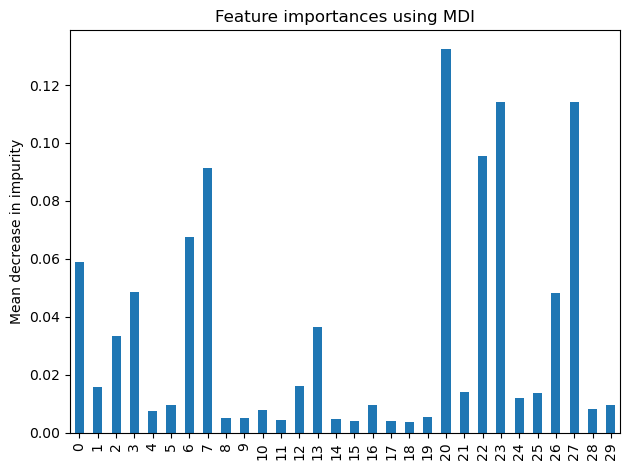

In [15]:
from sklearn.ensemble import RandomForestClassifier

forest = RandomForestClassifier()
forest.fit(X, y)

importances = forest.feature_importances_
forest_importances = pd.Series(importances)

fig, ax = plt.subplots()
forest_importances.plot.bar(ax=ax)
ax.set_title("Feature importances using MDI")
ax.set_ylabel("Mean decrease in impurity")
fig.tight_layout()

In [55]:
X_forest = X[:, [7, 20, 22, 23, 27]]

classify(X_forest, y, verbose = True)

('Accuracy: ', 0.948) ('Precision: ', 0.9731) ('Recall: ', 0.9558) ('F1 Score: ', 0.9593) ('Roc Auc: ', 0.9386)


array([0.94796667, 0.97308333, 0.9558    , 0.95932698, 0.938625  ])

# 2)

### Value Counts of Classes

In [16]:
df.diagnosis.value_counts()

B    357
M    212
Name: diagnosis, dtype: int64

# Random Undersampling

The imblearn library has under and oversampling methods implemented. 

Using the RandomUnderSampler method, we can see that the class with more samples is reduced to the number of samples that the lower one has.

In [17]:
from imblearn.under_sampling import RandomUnderSampler
from collections import Counter

rus = RandomUnderSampler()
X_res, y_res = rus.fit_resample(X_scaled, y)
print('Resampled dataset shape %s' % Counter(y_res))

Resampled dataset shape Counter({'B': 212, 'M': 212})


In [18]:
classify(X_res, y_res, verbose = True)

('Accuracy: ', 0.97) ('Precision: ', 0.98) ('Recall: ', 0.98) ('F1 Score: ', 0.97) ('Roc Auc: ', 0.97)


array([0.97115   , 0.97516667, 0.97658333, 0.97004286, 0.97083333])

# Random Oversampling

From the same library, we can use RandomOverSampler method, and as can be seen, lower sample size class has now equal samples to the higher sample sized class. 

In [19]:
from imblearn.over_sampling import RandomOverSampler

ros = RandomOverSampler()
X_res, y_res = ros.fit_resample(X_scaled, y)
print('Resampled dataset shape %s' % Counter(y_res))

Resampled dataset shape Counter({'M': 357, 'B': 357})


In [20]:
classify(X_res, y_res, verbose = True)

('Accuracy: ', 0.97) ('Precision: ', 0.98) ('Recall: ', 0.97) ('F1 Score: ', 0.97) ('Roc Auc: ', 0.97)


array([0.97228571, 0.97758333, 0.9729    , 0.97165714, 0.97245833])

# SMOTE

From the same library, we can use SMOTE to oversample the lower class again.

In [21]:
from imblearn.over_sampling import SMOTE

sm = SMOTE()
X_res, y_res = sm.fit_resample(X_scaled, y)
print('Resampled dataset shape %s' % Counter(y_res))

Resampled dataset shape Counter({'M': 357, 'B': 357})


In [22]:
classify(X_res, y_res, verbose = True)

('Accuracy: ', 0.97) ('Precision: ', 0.97) ('Recall: ', 0.97) ('F1 Score: ', 0.97) ('Roc Auc: ', 0.97)


array([0.97094643, 0.97383333, 0.97466667, 0.97038095, 0.97095833])

# ADASYN

Also ADASYN is present in this library.

In [23]:
from imblearn.over_sampling import ADASYN

ada = ADASYN()
X_res, y_res = ada.fit_resample(X_scaled, y)
print('Resampled dataset shape %s' % Counter(y_res))

Resampled dataset shape Counter({'M': 358, 'B': 357})


In [24]:
classify(X_res, y_res, verbose = True)

('Accuracy: ', 0.96) ('Precision: ', 0.97) ('Recall: ', 0.96) ('F1 Score: ', 0.96) ('Roc Auc: ', 0.96)


array([0.96233929, 0.9695    , 0.96288333, 0.96180952, 0.96283333])

# A_SUWO

This method is present in a library called smote_variants that can be installed using pip.

In [25]:
import smote_variants as sv

sv.A_SUWO

smote_variants.oversampling._a_suwo.A_SUWO

In [26]:
oversampler= sv.A_SUWO()
X_samp, y_samp= oversampler.sample(X_scaled, y)

2023-03-19 19:08:53,337:INFO:A_SUWO: Running sampling via ('A_SUWO', "{'proportion': 1.0, 'n_neighbors': 5, 'nn_params': {}, 'n_clus_maj': 7, 'c_thres': 0.8, 'n_jobs': 1, 'ss_params': {'n_dim': 2, 'simplex_sampling': 'random', 'within_simplex_sampling': 'random', 'gaussian_component': {}}, 'random_state': None, 'class_name': 'A_SUWO'}")
2023-03-19 19:08:53,339:INFO:NearestNeighborsWithMetricTensor: NN fitting with metric minkowski
2023-03-19 19:08:53,340:INFO:NearestNeighborsWithMetricTensor: kneighbors query minkowski
2023-03-19 19:08:53,391:INFO:NearestNeighborsWithMetricTensor: NN fitting with metric minkowski
2023-03-19 19:08:53,392:INFO:NearestNeighborsWithMetricTensor: kneighbors query minkowski
2023-03-19 19:08:53,519:INFO:NearestNeighborsWithMetricTensor: NN fitting with metric minkowski
2023-03-19 19:08:53,520:INFO:NearestNeighborsWithMetricTensor: kneighbors query minkowski
2023-03-19 19:08:53,549:INFO:NearestNeighborsWithMetricTensor: NN fitting with metric minkowski
2023-03

In [27]:
classify(X_samp, y_samp, verbose = True)

('Accuracy: ', 0.97) ('Precision: ', 0.97) ('Recall: ', 0.98) ('F1 Score: ', 0.97) ('Roc Auc: ', 0.97)


array([0.97003571, 0.96916667, 0.97631667, 0.96881667, 0.9705    ])